In [9]:
#imports:
from PIL import Image
import numpy as np
import cv2
import os
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [2]:
#variables:
folder = "original_img"
new_folder = "mask_image"
list_img = []

In [3]:
def making_new_folder(new_folder_name) -> None:
    if os.path.exists(new_folder_name):
        pass
    else:
        os.mkdir(new_folder_name)

In [16]:
making_new_folder(new_folder)
#Take image in the folder
file_names = sorted(os.listdir(folder))
for images in file_names:
    image = os.path.join(folder, images)
    list_img.append(image)

test_image = list_img[0]
print(test_image)

original_img\20210823-093054_00540-00000_HAxMMgoKHCgYwN8ax6tbhL.jpg


Com hsv:

True

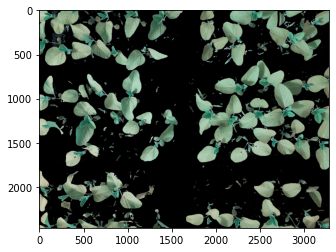

In [23]:
#reading the image
img = cv2.imread(test_image)

#convert the image to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#make the mask picture
mask = cv2.inRange(hsv, (15, 25, 25), (100, 255,255))

## slice the green
imask = mask>0
green = np.zeros_like(img, np.uint8)
green[imask] = img[imask]

imshow(green)
new_image = os.path.join(new_folder, "hsv.jpg")
new_image1 = os.path.join(new_folder, "hsv1.png")

plt.savefig(new_image1, format='png')
cv2.imwrite(new_image, green)

com BGR:

True

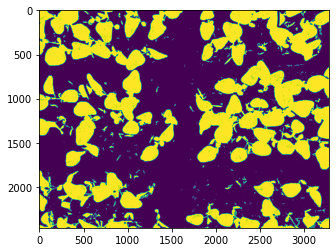

In [24]:
img = cv2.imread(test_image)
soma = (img[:,:,0] + img[:,:,1] + img[:,:,2])
r = img[:,:,2]
g = img[:,:,1]
b = img[:,:,0]

r1 = np.divide(r, soma, out=np.zeros_like(r, dtype=np.float64), where=soma!=0)
b1 = np.divide(b, soma, out=np.zeros_like(b, dtype=np.float64), where=soma!=0)
g1 = np.divide(g, soma, out=np.zeros_like(g, dtype=np.float64), where=soma!=0)

exG =(2*g1) - r1 - b1 

_, exG1 = cv2.threshold(exG, 0.1, 1055, cv2.THRESH_BINARY) #(_,)=> quer dizer que vc quer ignorar o primeiro valor da tupla que ele está retornando
imshow(exG1)

new_image = os.path.join(new_folder, "rgba.jpg")
new_image1 = os.path.join(new_folder, "rgba1.png")
plt.savefig(new_image1, format='png')
cv2.imwrite(new_image, exG1)